<a href="https://www.kaggle.com/code/leorickli/sportsstats-sql?scriptVersionId=122396528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# SportsStats Case Study

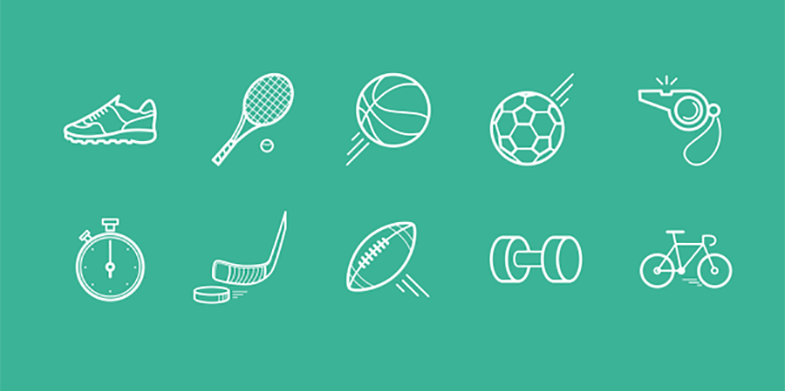

## Scenario

The course simulates you working at a fictitious company, as the course briefing cites:

You are a data scientist working for a data analytics firm. Your firm has explored a multitude of data sources. And is tasked with providing key insights that your clients can make actionable. Your manager has asked you to provide some data analytics guidance for one of the firm's clients. In a typical scenario you would work iteratively with your client to understand the data wanting to be analyzed. Having a solid understanding of the data and underlying assumptions present is crucial to the success of a data analysis project. However, in this case, you will need to do a little more of the heavy lifting. To begin, you will prepare a project proposal detailing the questions we are wanting to answer. The initial hypotheses about the data relationships and the approach you will take to get your answers.

The course is divided into Milestones:

* *Milestone 1 - Data Analysis:* Choose you dataset, your hypotheses and preliminarily data analysis
* *Milestone 2 - Descriptive Stats:* First queries, answering your questions
* *Milestone 3 - Beyond Descriptive Stats:* Expanding your questions, new connections, Pearson Correlation
* *Milestone 3 - Presenting Your Findings (Storytelling):* This whole notebook will be the Milestone 3

## Tools Used

The following tools were used for this capstone project:

* *Pandas (Python library):* This will be the primary tool to concatenate my SQL queries with dashboard tools like Matplotlib
* *PostgreSQL:* The tool that I used to make my queries
* *Lucid.app:* Used to make the ERD diagrams

## Milestone 1 - Data Analysis

### Step 1: Preparing for Your Proposal

1. Which client/dataset did you select and why?

I selected the SportsStats dataset because it’s the one that comes as csv files and weren’t that big compared to the other ones. The course did not teach me very well how to deal with json files, so I better get my first adventure in the csv land. I also had processing power problems with large files in my later projects, especially when presenting the data in a BI tool like Tableau.

2. Describe the steps you took to import and clean the data.

I downloaded the csv files to my computer; I checked for the integrity of data in Excel, apparently there is nothing wrong with the data, it seems clean; Uploaded to my Kaggle notebook, so I can register the study case for my portfolio.

3. Perform initial exploration of data and provide some screenshots or display some stats of the data you are looking at.

To perform the initial exploration of data, I will need the Pandas library in Python to load the PandasSQL library, so we can do SQL queries on our data. I will also upload Matplotlib and Numpy for later exploration of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

sportsstats = pd.read_csv('../input/case-study-part-1/athlete_events.csv')

In [2]:
sportsstats.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Doing some initial exploratory data analysis with very simple queries, there are a total of 271116 data points, 9474 lack age value, 60171 lack height value, 62875 lack weight value. Sex values are complete, games data and its attributes (year, city, etc.) are complete. Since team names can be changed, using NOC instead would prove more consistent. It's better to explore more of the data in the queries below

In [3]:
#difference in participation between males and females
print(pysqldf('''
SELECT 
    sex,
    COUNT(*),    
    COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS ratio
FROM 
    sportsstats
GROUP BY 
    sex
'''))

  Sex  COUNT(*)      ratio
0   F     74522  27.487127
1   M    196594  72.512873


In [4]:
#average of age, height and weight between males and females
print(pysqldf('''
SELECT 
    sex,
    AVG(age)    AS age,
    AVG(height) AS height,
    AVG(weight) AS weight
FROM 
    sportsstats
GROUP BY 
    sex
'''))

  Sex        age      height     weight
0   F  23.732881  167.839740  60.021252
1   M  26.277562  178.858463  75.743677


4. Create an ERD (Entity Relationship Diagram) or proposed ERD to show the relationships of the data you are exploring.

This ERD was created to make a small relational database, it's nice to have distinct tables for the Participants and Events data. The column "ID" is not enough to function as a primary key, the numbers are not distinct, so I made a new column "Event_ID" in the "Events" table as the primary key, this will serve as foreign key in the "Participants" table.

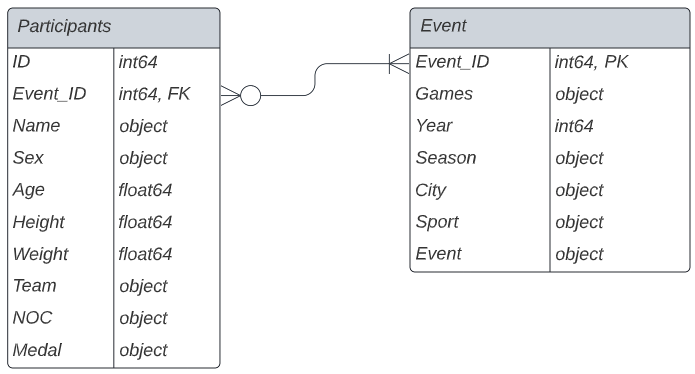

Using the ERD above, I divided the dataframe into two tables, one for the "Participants" and another one for the "Events"

In [5]:
sportsstats_participants = pysqldf('''
SELECT 
    id, name, sex, age, height, weight, team, noc, medal
FROM 
    sportsstats;
''')

df = pd.DataFrame(sportsstats_participants)
df.insert(1, "event_id", range(1, 1 + len(df)), False)

sportsstats_events = pysqldf('''
SELECT 
    games, year, season, city, sport, event
FROM 
    sportsstats;
''')

df2 = pd.DataFrame(sportsstats_events)
df2.insert(1, "event_id", range(1, 1 + len(df2)), False)

I won't use this split version of the tables, there is no need to utilize this feature in such a small table.

### Step 2: Develop Project Proposal

#### Description

This project is a collection from SportsStats of entries from athletes all around the world in different sports events also all around the world. Sports media in general and curiosity streams might also be interested in this data. The audience for this data might be sports afficionados or hobbyists.

#### Questions

1. Age is a determinant factor for your physical dexterity and mind, there must be a correlation between age and performance on sports. How does age affect the chance of getting a medal?
2. Even though ethnicity tend to increase the performance on certain sports (black athletes are better at running), unfortunately the developed countries tend to have better resources for making better athletes. How does the country affect the chance of getting more medals?
3. Male and female rights were very unbalanced some years ago, now that things are getting to and equilibrium, this might change. How is the proportion in frequency of male to female engagement throughout the years?

#### Hypothesis

1. The younger the age, the higher is the chance of getting a medal.
2. Developed countries will have more medals.
3. Male engagement tend to be higher in early years but nowadays there will be a balance.

#### Approach

1. A simple line chart is enough.
2. A simple bar chart is enough.
3. A simple histogram will give a good viz.

## Milestone 2 - Descriptive Stats

#### 1. Provide a summary of the different descriptive statistics you looked at and WHY.

To focus on the business questions, I will address them one by one by wrangling the data to extract more information, there might be rabbit holes in the way but this will help discovering new hypotheses out of the initial analysis.

1. How does age affect the chance of getting a medal?

Text(0.5, 1.0, 'Best age to get medal')

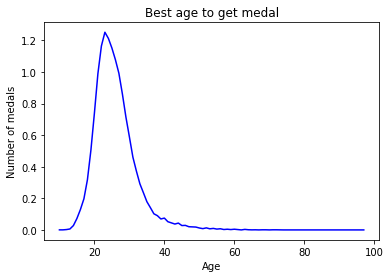

In [6]:
medal_count = pysqldf('''
SELECT
    age,
    medal_count,
    CAST(medal_count AS float)*100 / 271116 AS ratio
FROM (
    SELECT
        age,
        COUNT(*) AS total_count,
        SUM(CASE
              WHEN medal IS NOT NULL THEN 1 ELSE 0
            END) AS medal_count
    FROM
        sportsstats
    GROUP BY
        age
    ) medals
WHERE age IS NOT NULL
GROUP BY
    age,
    medals.medal_count,
    medals.total_count
''')

plt.plot(medal_count.age, medal_count.ratio, color = "blue")
plt.xlabel('Age')
plt.ylabel('Number of medals')
plt.title('Best age to get medal')

The first questions can be answered with the graph above. The best age for winning a medal is between the ages of 20 to 25, this must be a correlation with the level of athleticism and dexterity that the majority of sports require.

I will explore further in the data to gather some more useful information from it.

Text(0.5, 1.0, 'Summer Olympics')

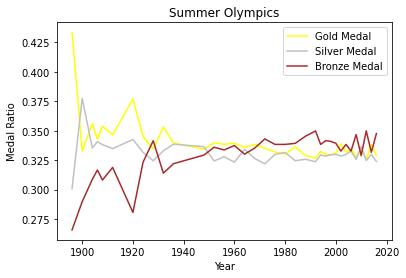

In [7]:
difference_medal_count = pysqldf('''
SELECT
  year,
  CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
  CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
  CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
  CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
FROM
(
     SELECT
         year,
         COUNT(*) AS total_count,
         SUM(CASE
               WHEN Medal IS NOT NULL THEN 1 ELSE 0
             END) AS medal_count,
         SUM(CASE
               WHEN Medal = 'Gold' THEN 1 ELSE 0
             END) AS gold_count,
         SUM(CASE
               WHEN Medal = 'Silver' THEN 1 ELSE 0
             END) AS silver_count,
         SUM(CASE
               WHEN Medal = 'Bronze' THEN 1 ELSE 0
             END) AS bronze_count
         FROM
           sportsstats
         GROUP BY
           year 
    )new_table
''')

plt.plot(difference_medal_count.year, difference_medal_count.gold_ratio, color = "yellow")
plt.plot(difference_medal_count.year, difference_medal_count.silver_ratio, color = "silver")
plt.plot(difference_medal_count.year, difference_medal_count.bronze_ratio, color = "brown")
plt.legend(['Gold Medal', 'Silver Medal', 'Bronze Medal'])
plt.xlabel('Year')
plt.ylabel('Medal Ratio')
plt.title('Summer Olympics')

By wrangling some data, I found and interesting pattern, the ratio between the amount of gold, silver and bronze medals won through the years have stabilized, there might be a correlation between the evolution of rules, technology or engineering of new devices and preparation of participants for the occurence of this phenomenon. This could be further explored by using more data from other sources.

2. Developed countries will have more medals.

To test this hypothesis, I will update the "medal_count" query used to get the age probability of getting a medal

Text(0.5, 1.0, 'Medals Per Country')

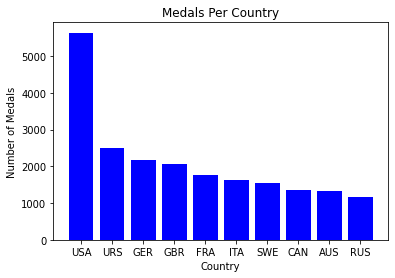

In [8]:
medal_count_country = pysqldf('''
SELECT
    noc,
    medal_count
FROM (
    SELECT
        noc,
        COUNT(*) AS total_count,
        SUM(CASE
              WHEN medal IS NOT NULL THEN 1 ELSE 0
            END) AS medal_count
    FROM
        sportsstats
    GROUP BY
        noc
    ) medals
WHERE noc IS NOT NULL
ORDER BY medal_count DESC
LIMIT 10
''')

plt.bar(medal_count_country.noc, medal_count_country.medal_count, color = "blue")
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Medals Per Country')

As expected, developed countries tend to have a bigger quantity of medals acumulated, this might be due to the resources invested in technology and science to further increase performance in each sport.

3. How is the proportion in frequency of male to female engagement throughout the years?




Text(0.5, 1.0, 'Difference Male x Female per Year')

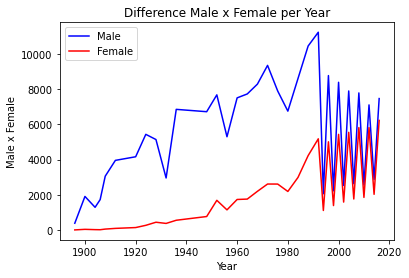

In [9]:
male_female_count = pysqldf('''
SELECT
    Year,
    SUM(CASE
          WHEN sex = 'M' THEN 1 ELSE 0
        END) AS male_count,
    SUM(CASE
          WHEN sex = 'F' THEN 1 ELSE 0
        END) AS female_count    
FROM
    sportsstats
GROUP BY
    Year
''')

plt.plot(male_female_count.Year, male_female_count.male_count, color = "blue")
plt.plot(male_female_count.Year, male_female_count.female_count, color = "red")
plt.legend(['Male', 'Female'])
plt.xlabel('Year')
plt.ylabel('Male x Female')
plt.title('Difference Male x Female per Year')

Male frequeny, as expect, was higher in the early years but stabilized with the female frequency in most recent years. Male participation is now marginally superior to the female but its frequeny is following the same pattern to the female numbers.

#### 2. Submit 2-3 key points you may have discovered about the data, e.g. new relationships? Aha's! Did you come up with additional ideas for other things to review?

1. As mentioned above, I found and interesting pattern, the ratio between the amount of gold, silver and bronze medals won through the years have stabilized, there might be a correlation between the evolution of rules, technology or engineering of new devices and preparation of participants for the occurence of this phenomenon. This could be further explored by using more data from other sources.
2. A curious pattern has formed over the 'male_female_count' query. By the end of the 1990's, male participation is marginally superior to the female but its frequency is following the same pattern to the female numbers.

#### 3. Did you prove or disprove any of your initial hypotheses? If so, which one and what do you plan to do next?

My first assumption is that the ratio of women to men would increase over time. I will create a year-by-year Female to Male ratio table, and then draw a line graph to see the relationship.


Text(0.5, 1.0, 'Female x Male Ratio Over Years')

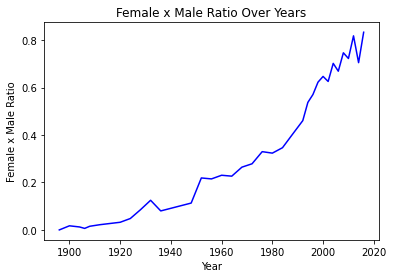

In [10]:
female_male_ratio = pysqldf('''
SELECT 
    Year,
    CAST(SUM(CASE WHEN Sex = 'F' THEN 1 ELSE 0 END) AS float) / CAST(SUM(CASE WHEN Sex = 'M' THEN 1 ELSE 0 END) AS float) AS ratio
FROM 
    sportsstats
GROUP BY 
    Year
''')

plt.plot(female_male_ratio.Year, female_male_ratio.ratio, color = "blue")
plt.xlabel('Year')
plt.ylabel('Female x Male Ratio')
plt.title('Female x Male Ratio Over Years')

This assumption seems to be correct, over time, the ratio of men to women has indeed decreased.

#### 4. What additional questions are you seeking to answer?

I will seek a correlation between summer and winter games throughout the years.

## Milestone 3 - Beyond Descriptive Stats

For this milestone, I will expand the features that are being investigated by looking for connections/relationships that may have been initially missed. I will use the Pearson Correlation to find some trendings between the the SportsStats data.

In [11]:
sportsstats.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.003631,-0.011141,-0.009176,0.011885
Age,-0.003631,1.000000,0.138246,0.212069,-0.115137
Height,-0.011141,0.138246,1.000000,0.796213,0.047578
Weight,-0.009176,0.212069,0.796213,1.000000,0.019095
Year,0.011885,-0.115137,0.047578,0.019095,1.000000


The Pearson Correlation between Weight and Height is 0.79, which is positive.

By wrangling more data in search for new answers, I will create two tables to count the total number of medals in the summer and winter olympics, then calculate the Pearson Correlation between the total number of medals in the summer and winter olympics.

In [12]:
summer_medal_count = pysqldf('''
SELECT
    year,
    COUNT(*) AS total_count,
    SUM(CASE
          WHEN medal IS NOT NULL THEN 1 ELSE 0
        END) AS medal_count,
    SUM(CASE
          WHEN medal = 'Gold' THEN 1 ELSE 0
        END) AS gold_count,
    SUM(CASE
          WHEN medal = 'Silver' THEN 1 ELSE 0
        END) AS silver_count,
    SUM(CASE
          WHEN medal = 'Bronze' THEN 1 ELSE 0
        END) AS bronze_count
FROM
    sportsstats
WHERE
    season = 'Summer'
GROUP BY
    year
''')

winter_medal_count = pysqldf('''
SELECT
    year,
    COUNT(*) AS total_count,
    SUM(CASE
          WHEN medal IS NOT NULL THEN 1 ELSE 0
        END) AS medal_count,
    SUM(CASE
          WHEN medal = 'Gold' THEN 1 ELSE 0
        END) AS gold_count,
    SUM(CASE
          WHEN medal = 'Silver' THEN 1 ELSE 0
        END) AS silver_count,
    SUM(CASE
          WHEN medal = 'Bronze' THEN 1 ELSE 0
        END) AS bronze_count
FROM
    sportsstats
WHERE
    season = 'Winter'
GROUP BY
    year
''')

In [13]:
summer_medal_count

,Year,total_count,medal_count,gold_count,silver_count,bronze_count
0,1896,380,143,62,43,38
1,1900,1936,604,201,228,175
2,1904,1301,486,173,163,150
3,1906,1733,458,157,156,145
4,1908,3101,831,294,281,256
5,1912,4040,941,326,315,300
6,1920,4292,1308,493,448,367
7,1924,5233,832,277,281,274
8,1928,4992,734,245,239,250
9,1932,2969,647,229,214,204


In [14]:
winter_medal_count

,Year,total_count,medal_count,gold_count,silver_count,bronze_count
0,1924,460,130,55,38,37
1,1928,582,89,30,28,31
2,1932,352,92,32,32,28
3,1936,895,108,36,37,35
4,1948,1075,135,41,48,46
5,1952,1088,136,45,44,47
6,1956,1307,150,51,49,50
7,1960,1116,147,50,48,49
8,1964,1778,186,61,67,58
9,1968,1891,199,66,70,63


The number of rows in the 'summer_medal_count' is bigger because the Winter Olympics started in 1924, but Summer Olympics started in 1896. A 'summer_medal_count_altered' will have to be created by quering the games that started in 1924, thus matching the rows of the Winter Olympics.

In [15]:
summer_medal_count_altered = summer_medal_count[7:]

Now it's possible to calculate the Pearson Correlation between the total number of medals in the Summer and Winter Olympics from the years of 1924 to 2016.

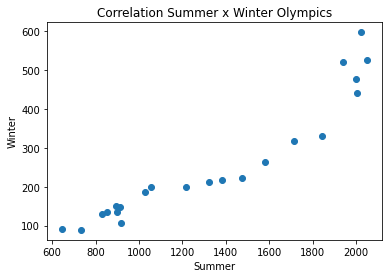

In [16]:
x = summer_medal_count_altered.medal_count
y = winter_medal_count.medal_count
plt.xlabel('Summer')
plt.ylabel('Winter')
plt.title('Correlation Summer x Winter Olympics')
plt.scatter(x, y)

In [17]:
np.corrcoef(x, y)

array([[1.        , 0.94141801],
       [0.94141801, 1.        ]])

The Pearson Correlation between the total number of medals in the Summer and Winter Olympics from 1924 to 2016 is 0.94, which is highly positive. It states that the amount of medals in Summer Olympics has a big correlation when compared to the Winter Olympics.

## Milestone 3 - Presenting Your Findings (Storytelling)

This notebook will serve as the presentation proposed by this milestone.
